# Teradata TableSpace History Report

This notebook demonstrates how to retrieve table space usage history from Teradata PDCR data using the `PDCRInfoReport` class.

**Report Parameters:**
- Database filter: `DWP01%` (all databases starting with DWP01)
- Time range: Last month
- Data source: `PDCRINFO.TableSpace_Hst`

## 1. Import Required Libraries

Import necessary libraries for PDCR reporting and data analysis.

In [1]:
import logging
import sys
from pathlib import Path
from datetime import date, timedelta
import pandas as pd

# Add src to path for imports
sys.path.insert(0, str(Path.cwd()))

# Import the reporting module
from src.reports import PDCRInfoReport
from src.connection import TeradataConnectionError

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Configure Date Range

Calculate the date range for the last month's data.

In [2]:
# Calculate last month's date range
end_date = date.today() - timedelta(days=1)  # Yesterday
start_date = end_date - timedelta(days=30)   # 30 days ago

# Database filter pattern
database_pattern = "DWP01%"

print(f"Date Range:")
print(f"  Start Date: {start_date}")
print(f"  End Date:   {end_date}")
print(f"  Database Pattern: {database_pattern}")
print(f"  Days: {(end_date - start_date).days + 1}")

Date Range:
  Start Date: 2025-12-15
  End Date:   2026-01-14
  Database Pattern: DWP01%
  Days: 31


## 3. Initialize PDCR Report Generator

Create an instance of the `PDCRInfoReport` class to access PDCR data.

In [3]:
try:
    # Initialize the report generator
    report = PDCRInfoReport()
    print("✓ PDCRInfoReport initialized successfully")
    
    # List available environments
    environments = report.conn_mgr.list_environments()
    print(f"✓ Available environments: {environments}")
    
except TeradataConnectionError as e:
    print(f"✗ Connection Error: {e}")
    print("\nPlease ensure:")
    print("1. td_env.yaml file exists in the project root")
    print("2. Copy td_env.yaml.template to td_env.yaml")
    print("3. Update credentials for your test/prod environments")

2026-01-15 07:48:16,147 - src.connection - INFO - Loaded configuration for: ['test', 'prod']


✓ PDCRInfoReport initialized successfully
✓ Available environments: ['test', 'prod']


## 4. Retrieve TableSpace History Data

Query `PDCRINFO.TableSpace_Hst` for all tables in databases starting with `DWP01%` over the last month.

In [4]:
try:
    # Retrieve tablespace history
    df = report.get_tablespace_history(
        env_name='test',  # Change to 'prod' for production data
        start_date=start_date,
        end_date=end_date,
        database_name=database_pattern
    )
    
    print(f"✓ Retrieved {len(df):,} rows from PDCRINFO.TableSpace_Hst")
    print(f"\nDataFrame Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except Exception as e:
    print(f"✗ Error retrieving tablespace data: {e}")
    df = None

2026-01-15 07:48:16,165 - src.reports - INFO - Query Text: 
        SELECT
            LogDate,
            DatabaseName,
            Tablename,
            AccountName,
            CURRENTPERM,
            PEAKPERM,
            CURRENTPERMSKEW,
            PEAKPERMSKEW
        FROM PDCRINFO.TableSpace_Hst
        WHERE Logdate BETWEEN :start_date AND :end_date
          AND TRIM(DatabaseName) LIKE :database_name
        ORDER BY 1, 2, 3;
        
2026-01-15 07:48:16,167 - src.reports - INFO - Fetching TableSpace history for test between 2025-12-15 and 2026-01-14
2026-01-15 07:48:16,168 - src.connection - INFO - Connection string: teradatasql://@teradw/ALL?logmech=BROWSER


Connection string: teradatasql://@teradw/ALL?logmech=BROWSER
2026-01-15 07:48:20,871 INFO sqlalchemy.engine.Engine SELECT dbc.dbcinfov."InfoData" 
FROM dbc.dbcinfov 
WHERE dbc.dbcinfov."InfoKey" = ?


2026-01-15 07:48:20,871 - sqlalchemy.engine.Engine - INFO - SELECT dbc.dbcinfov."InfoData" 
FROM dbc.dbcinfov 
WHERE dbc.dbcinfov."InfoKey" = ?


2026-01-15 07:48:20,873 INFO sqlalchemy.engine.Engine [dialect teradatasql+teradatasql does not support caching 0.00246s] ('VERSION',)


2026-01-15 07:48:20,873 - sqlalchemy.engine.Engine - INFO - [dialect teradatasql+teradatasql does not support caching 0.00246s] ('VERSION',)


2026-01-15 07:48:20,917 INFO sqlalchemy.engine.Engine select database


2026-01-15 07:48:20,917 - sqlalchemy.engine.Engine - INFO - select database


2026-01-15 07:48:20,921 INFO sqlalchemy.engine.Engine [dialect teradatasql+teradatasql does not support caching 0.00383s] ()


2026-01-15 07:48:20,921 - sqlalchemy.engine.Engine - INFO - [dialect teradatasql+teradatasql does not support caching 0.00383s] ()


2026-01-15 07:48:21,047 INFO sqlalchemy.engine.Engine BEGIN (implicit)


2026-01-15 07:48:21,047 - sqlalchemy.engine.Engine - INFO - BEGIN (implicit)


2026-01-15 07:48:21,050 INFO sqlalchemy.engine.Engine SELECT 1


2026-01-15 07:48:21,050 - sqlalchemy.engine.Engine - INFO - SELECT 1


2026-01-15 07:48:21,051 INFO sqlalchemy.engine.Engine [dialect teradatasql+teradatasql does not support caching 0.00378s] ()


2026-01-15 07:48:21,051 - sqlalchemy.engine.Engine - INFO - [dialect teradatasql+teradatasql does not support caching 0.00378s] ()


2026-01-15 07:48:21,094 INFO sqlalchemy.engine.Engine ROLLBACK


2026-01-15 07:48:21,094 - sqlalchemy.engine.Engine - INFO - ROLLBACK
2026-01-15 07:48:21,138 - src.connection - INFO - Created connection to 'test' environment


2026-01-15 07:48:21,184 INFO sqlalchemy.engine.Engine BEGIN (implicit)


2026-01-15 07:48:21,184 - sqlalchemy.engine.Engine - INFO - BEGIN (implicit)


2026-01-15 07:48:21,185 INFO sqlalchemy.engine.Engine SELECT dbc."tablesV"."TableName" 
FROM dbc."tablesV" 
WHERE DatabaseName (NOT CASESPECIFIC) = ? (NOT CASESPECIFIC) AND TableName=? AND TableKind IN ('O', 'Q', 'T', 'V')


2026-01-15 07:48:21,185 - sqlalchemy.engine.Engine - INFO - SELECT dbc."tablesV"."TableName" 
FROM dbc."tablesV" 
WHERE DatabaseName (NOT CASESPECIFIC) = ? (NOT CASESPECIFIC) AND TableName=? AND TableKind IN ('O', 'Q', 'T', 'V')


2026-01-15 07:48:21,186 INFO sqlalchemy.engine.Engine [dialect teradatasql+teradatasql does not support caching 0.00262s] ('ALL', <sqlalchemy.sql.elements.TextClause object at 0x0000028400791D10>)


2026-01-15 07:48:21,186 - sqlalchemy.engine.Engine - INFO - [dialect teradatasql+teradatasql does not support caching 0.00262s] ('ALL', <sqlalchemy.sql.elements.TextClause object at 0x0000028400791D10>)


2026-01-15 07:48:21,188 INFO sqlalchemy.engine.Engine 
        SELECT
            LogDate,
            DatabaseName,
            Tablename,
            AccountName,
            CURRENTPERM,
            PEAKPERM,
            CURRENTPERMSKEW,
            PEAKPERMSKEW
        FROM PDCRINFO.TableSpace_Hst
        WHERE Logdate BETWEEN ? AND ?
          AND TRIM(DatabaseName) LIKE ?
        ORDER BY 1, 2, 3;
        


2026-01-15 07:48:21,188 - sqlalchemy.engine.Engine - INFO - 
        SELECT
            LogDate,
            DatabaseName,
            Tablename,
            AccountName,
            CURRENTPERM,
            PEAKPERM,
            CURRENTPERMSKEW,
            PEAKPERMSKEW
        FROM PDCRINFO.TableSpace_Hst
        WHERE Logdate BETWEEN ? AND ?
          AND TRIM(DatabaseName) LIKE ?
        ORDER BY 1, 2, 3;
        


2026-01-15 07:48:21,190 INFO sqlalchemy.engine.Engine [dialect teradatasql+teradatasql does not support caching 0.00178s] ('2025-12-15', '2026-01-14', 'DWP01%')


2026-01-15 07:48:21,190 - sqlalchemy.engine.Engine - INFO - [dialect teradatasql+teradatasql does not support caching 0.00178s] ('2025-12-15', '2026-01-14', 'DWP01%')


2026-01-15 07:48:43,152 INFO sqlalchemy.engine.Engine ROLLBACK


2026-01-15 07:48:43,152 - sqlalchemy.engine.Engine - INFO - ROLLBACK


✓ Retrieved 182,268 rows from PDCRINFO.TableSpace_Hst

DataFrame Shape: (182268, 8)
Memory Usage: 45.61 MB


## 5. Display Sample Data

Preview the first few rows to understand the data structure.

In [5]:
if df is not None and not df.empty:
    print("First 10 rows:")
    display(df.head(10))
    
    print("\nColumn Data Types:")
    print(df.dtypes)
else:
    print("No data available to display.")

First 10 rows:


,LogDate,DatabaseName,Tablename,AccountName,CURRENTPERM,PEAKPERM,CURRENTPERMSKEW,PEAKPERMSKEW
0,2025-12-15,DWP01P_APP_EHR,CUBEVIEW_FACTGRADE,$M00DBAB&D&H,2195456.0,0.0,47.656250,NaN
1,2025-12-15,DWP01P_APP_EHR,CUBEVIEW_KIMBALLATTRIBUTESSEASON,$M00DBAB&D&H,2195456.0,0.0,47.656250,NaN
2,2025-12-15,DWP01P_APP_EHR,DAILYSALESREPORTFILESMARKASPROCESSED,$M00DBAB&D&H,2228224.0,0.0,64.583333,NaN
3,2025-12-15,DWP01P_APP_EHR,DAILYSALESREPORTMISSINGSTORES,$M00DBAB&D&H,2195456.0,0.0,47.656250,NaN
4,2025-12-15,DWP01P_APP_EHR,DAILYSALESREPORTVALIDATESTAGING,$M00DBAB&D&H,2228224.0,0.0,64.583333,NaN
5,2025-12-15,DWP01P_APP_EHR,FORMATKIMBALL,$M00DBAB&D&H,2195456.0,0.0,47.656250,NaN
6,2025-12-15,DWP01P_APP_EHR,FORMATSTYLEREF,$M00DBAB&D&H,2162688.0,0.0,48.437500,NaN
7,2025-12-15,DWP01P_APP_EHR,GETCOMMITMENTSWITHSEASONANDSEASONALITY,$M00DBAB&D&H,2195456.0,0.0,47.656250,NaN
8,2025-12-15,DWP01P_APP_EHR,RETURNCATALOGUEREPORTDATASET,$M00DBAB&D&H,2392064.0,0.0,80.989583,NaN
9,2025-12-15,DWP01P_APP_EHR,RETURNCOMMITMENTREPORTDATASET,$M00DBAB&D&H,2228224.0,0.0,64.583333,NaN



Column Data Types:
LogDate             object
DatabaseName        object
Tablename           object
AccountName         object
CURRENTPERM        float64
PEAKPERM           float64
CURRENTPERMSKEW    float64
PEAKPERMSKEW       float64
dtype: object


## 6. Data Summary Statistics

Analyze the tablespace usage across all retrieved data.

In [6]:
if df is not None and not df.empty:
    print("=" * 80)
    print("TABLESPACE SUMMARY STATISTICS")
    print("=" * 80)
    
    # Date range
    print(f"\nDate Range:")
    print(f"  First Log Date: {df['LogDate'].min()}")
    print(f"  Last Log Date:  {df['LogDate'].max()}")
    print(f"  Unique Dates:   {df['LogDate'].nunique()}")
    
    # Database coverage
    print(f"\nDatabase Coverage:")
    print(f"  Unique Databases: {df['DatabaseName'].nunique()}")
    print(f"  Unique Tables:    {df['Tablename'].nunique()}")
    print(f"  Unique Accounts:  {df['AccountName'].nunique()}")
    
    # Space usage statistics (in bytes, convert to GB)
    print(f"\nCurrent Perm Usage (GB):")
    print(f"  Total:   {df['CURRENTPERM'].sum() / 1024**3:,.2f}")
    print(f"  Mean:    {df['CURRENTPERM'].mean() / 1024**3:,.2f}")
    print(f"  Median:  {df['CURRENTPERM'].median() / 1024**3:,.2f}")
    print(f"  Max:     {df['CURRENTPERM'].max() / 1024**3:,.2f}")
    
    print(f"\nPeak Perm Usage (GB):")
    print(f"  Total:   {df['PEAKPERM'].sum() / 1024**3:,.2f}")
    print(f"  Mean:    {df['PEAKPERM'].mean() / 1024**3:,.2f}")
    print(f"  Median:  {df['PEAKPERM'].median() / 1024**3:,.2f}")
    print(f"  Max:     {df['PEAKPERM'].max() / 1024**3:,.2f}")
    
    # Skew statistics
    print(f"\nSkew Statistics:")
    print(f"  Avg Current Skew: {df['CURRENTPERMSKEW'].mean():.2f}%")
    print(f"  Avg Peak Skew:    {df['PEAKPERMSKEW'].mean():.2f}%")
    print(f"  Max Current Skew: {df['CURRENTPERMSKEW'].max():.2f}%")
    print(f"  Max Peak Skew:    {df['PEAKPERMSKEW'].max():.2f}%")
else:
    print("No data available for analysis.")

TABLESPACE SUMMARY STATISTICS

Date Range:
  First Log Date: 2025-12-15
  Last Log Date:  2026-01-14
  Unique Dates:   31

Database Coverage:
  Unique Databases: 92
  Unique Tables:    5735
  Unique Accounts:  3

Current Perm Usage (GB):
  Total:   1,227,726.13
  Mean:    6.74
  Median:  0.00
  Max:     5,346.11

Peak Perm Usage (GB):
  Total:   1,119,386.27
  Mean:    6.14
  Median:  0.00
  Max:     5,346.11

Skew Statistics:
  Avg Current Skew: 16.06%
  Avg Peak Skew:    21.35%
  Max Current Skew: 98.29%
  Max Peak Skew:    99.22%


## 7. Top Tables by Current Space Usage

Identify the largest tables by current permanent space usage.

In [7]:
if df is not None and not df.empty:
    # Get the most recent data for each table
    latest_data = df.loc[df.groupby(['DatabaseName', 'Tablename'])['LogDate'].idxmax()]
    
    # Sort by current perm usage
    top_tables = latest_data.nlargest(20, 'CURRENTPERM')[[
        'DatabaseName', 'Tablename', 'AccountName', 
        'CURRENTPERM', 'PEAKPERM', 'CURRENTPERMSKEW'
    ]].copy()
    
    # Convert to GB for readability
    top_tables['CURRENTPERM_GB'] = top_tables['CURRENTPERM'] / 1024**3
    top_tables['PEAKPERM_GB'] = top_tables['PEAKPERM'] / 1024**3
    
    print("\nTop 20 Tables by Current Permanent Space Usage:")
    print("=" * 80)
    display(top_tables[[
        'DatabaseName', 'Tablename', 'CURRENTPERM_GB', 
        'PEAKPERM_GB', 'CURRENTPERMSKEW'
    ]])
else:
    print("No data available for table ranking.")


Top 20 Tables by Current Permanent Space Usage:


,DatabaseName,Tablename,CURRENTPERM_GB,PEAKPERM_GB,CURRENTPERMSKEW
176629,DWP01T_ACC_ORR,DW_AGG_SALES_FV,5346.110626,5346.110626,0.018477
176635,DWP01T_ACC_ORR,DW_AGG_STOCK_FV,5250.539333,5250.539333,0.020329
176736,DWP01T_ACC_ORR,DW_STOCK_POSITION_DY_FV,4465.408966,4465.408966,0.011310
178238,DWP01T_SRCI_AOM,APTOSLINE_NOTE,1121.168335,1121.168335,0.050722
176726,DWP01T_ACC_ORR,DW_SLS_TXN_LN_FV,1084.378441,1084.378441,0.099322
177236,DWP01T_IDW,ITEM_INVTRY,805.507225,805.507240,0.055629
177228,DWP01T_IDW,INVTRY_TSACTN_ITEM,734.759876,734.759876,0.197231
178246,DWP01T_SRCI_AOM,APTOSTRANSACTION_LINE,638.251499,638.251499,0.038767
176738,DWP01T_ACC_ORR,DW_STOCK_POSITION_PACK_DY_FV,591.927120,591.927120,0.030368
178239,DWP01T_SRCI_AOM,APTOSMERCHANDISE_DETAIL,548.295834,548.295902,0.073428


## 8. Database-Level Aggregation

Aggregate space usage by database to see which databases consume the most space.

In [8]:
if df is not None and not df.empty:
    # Get most recent data
    latest_data = df.loc[df.groupby(['DatabaseName', 'Tablename'])['LogDate'].idxmax()]
    
    # Aggregate by database
    db_summary = latest_data.groupby('DatabaseName').agg({
        'Tablename': 'count',
        'CURRENTPERM': 'sum',
        'PEAKPERM': 'sum',
        'CURRENTPERMSKEW': 'mean'
    }).round(2)
    
    # Rename and convert
    db_summary.columns = ['TableCount', 'CurrentPerm', 'PeakPerm', 'AvgSkew']
    db_summary['CurrentPerm_GB'] = (db_summary['CurrentPerm'] / 1024**3).round(2)
    db_summary['PeakPerm_GB'] = (db_summary['PeakPerm'] / 1024**3).round(2)
    
    # Sort by current usage
    db_summary = db_summary.sort_values('CurrentPerm_GB', ascending=False)
    
    print("\nDatabase-Level Space Usage Summary:")
    print("=" * 80)
    display(db_summary[['TableCount', 'CurrentPerm_GB', 'PeakPerm_GB', 'AvgSkew']])
    
    print(f"\nTotal Space Across All DWP01% Databases: {db_summary['CurrentPerm_GB'].sum():,.2f} GB")
else:
    print("No data available for database aggregation.")


Database-Level Space Usage Summary:


,TableCount,CurrentPerm_GB,PeakPerm_GB,AvgSkew
DatabaseName,,,,
DWP01T_ACC_ORR,262,19611.14,19468.13,11.40
DWP01T_SRCI_RMS,1291,7231.26,6961.37,8.31
DWP01T_IDW,378,5768.12,5722.32,13.57
DWP01T_SRCI_AOM,16,3244.97,3192.11,1.31
DWP01T_TMP_BKP,31,761.90,507.52,23.41
...,...,...,...,...
DWP01T_STG_CEV,2,0.01,0.00,55.04
DWP01T_APP_EHR_EXPORT,1,0.00,0.00,38.28
DWP01P_MET,2,0.00,0.00,47.66



Total Space Across All DWP01% Databases: 40,743.34 GB


# 9. Visualize Database Space Usage

Visualize the top databases by current permanent space usage using a bar chart.

C:\Users\cwatts\AppData\Local\Temp\ipykernel_27876\33054940.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


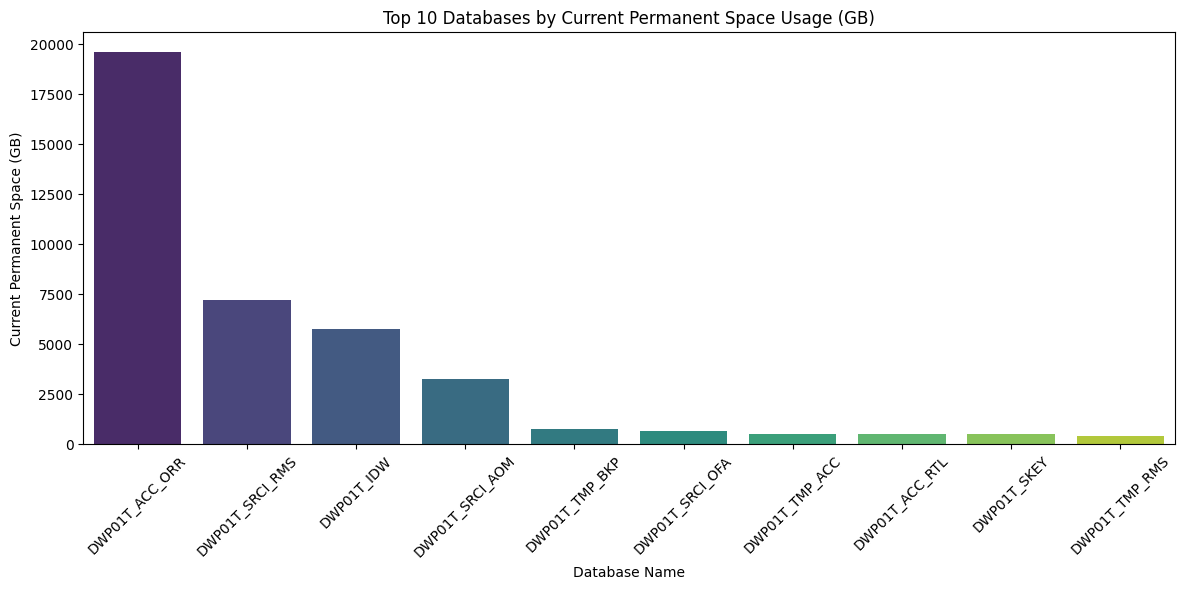

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
if df is not None and not df.empty:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Get most recent data
    latest_data = df.loc[df.groupby(['DatabaseName', 'Tablename'])['LogDate'].idxmax()]

    # Aggregate by database
    db_summary = latest_data.groupby('DatabaseName').agg({
        'CURRENTPERM': 'sum'
    }).reset_index()

    # Convert to GB
    db_summary['CURRENTPERM_GB'] = db_summary['CURRENTPERM'] / 1024**3

    # Get top 10 databases
    top_dbs = db_summary.nlargest(10, 'CURRENTPERM_GB')

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_dbs,
        x='DatabaseName',
        y='CURRENTPERM_GB',
        palette='viridis'
    )
    plt.title('Top 10 Databases by Current Permanent Space Usage (GB)')
    plt.xlabel('Database Name')
    plt.ylabel('Current Permanent Space (GB)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

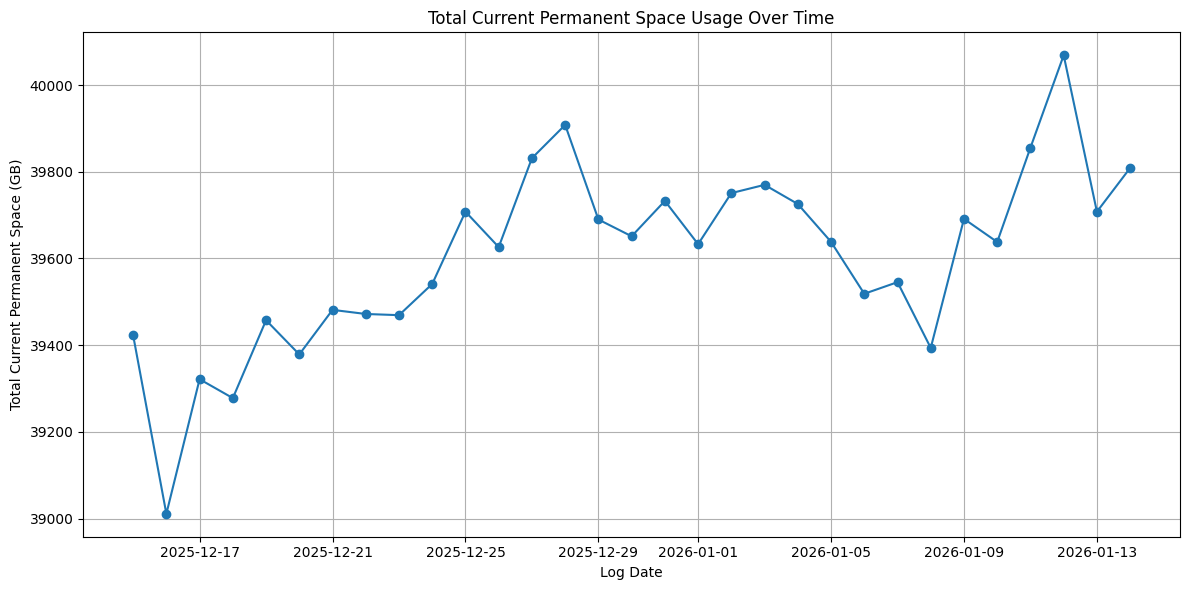

In [19]:
# plot total space usage for all databases over time
import matplotlib.pyplot as plt
df_databases_over_time = df.groupby(['LogDate'])['CURRENTPERM'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_databases_over_time['LogDate'], df_databases_over_time['CURRENTPERM'] / 1024**3, marker='o')
plt.title('Total Current Permanent Space Usage Over Time')
plt.xlabel('Log Date')
plt.ylabel('Total Current Permanent Space (GB)')
plt.grid()
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x2844db29bd0>,
 [Text(-0.7552366844066244, -0.7997609333585187, 'DWP01T_ACC_ORR'),
  Text(1.063639062876907, -0.28048519376668546, 'DWP01T_SRCI_RMS'),
  Text(0.8089635395748611, 0.7453710429299707, 'DWP01T_IDW'),
  Text(0.14403317139171365, 1.0905294335958318, 'DWP01T_SRCI_AOM'),
  Text(-0.19437928276253388, 1.0826895651259982, 'DWP01T_TMP_BKP'),
  Text(-0.5791950506096442, 0.9351647412885561, 'Other')],
 [Text(-0.4119472824036133, -0.4362332363773738, '48.1%'),
  Text(0.580166761569222, -0.15299192387273752, '17.7%'),
  Text(0.44125283976810603, 0.4065660234163476, '14.2%'),
  Text(0.0785635480318438, 0.5948342365068172, '8.0%'),
  Text(-0.10602506332501847, 0.5905579446141808, '1.9%'),
  Text(-0.31592457305980587, 0.5100898588846668, '10.1%')])

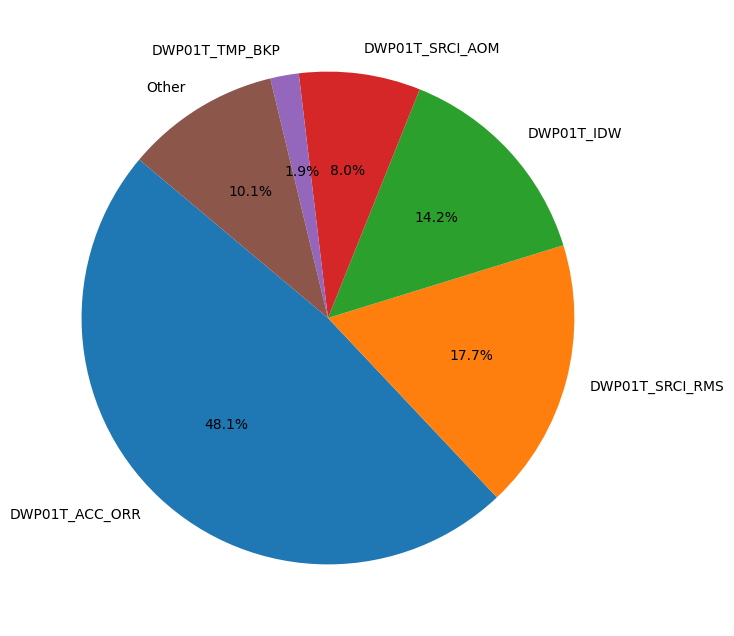

In [ ]:
# plot as pie chart per database usage , the top databases by current permanent space usage , and then group the rest as 'Other'
import matplotlib.pyplot as plt
df_latest = df.loc[df.groupby(['DatabaseName', 'Tablename'])['LogDate'].idxmax()]
df_db_usage = df_latest.groupby('DatabaseName')['CURRENTPERM'].sum().reset_index()
df_db_usage = df_db_usage.sort_values('CURRENTPERM', ascending=False)
top_n = 5
df_top = df_db_usage.head(top_n)
df_other = pd.DataFrame({
    'DatabaseName': ['Other'],
    'CURRENTPERM': [df_db_usage['CURRENTPERM'][top_n:].sum()]
})
df_pie = pd.concat([df_top, df_other])
plt.figure(figsize=(8, 8))
plt.pie(
    df_pie['CURRENTPERM'],
    labels=df_pie['DatabaseName'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Current Permanent Space Usage by Database')
plt.show()

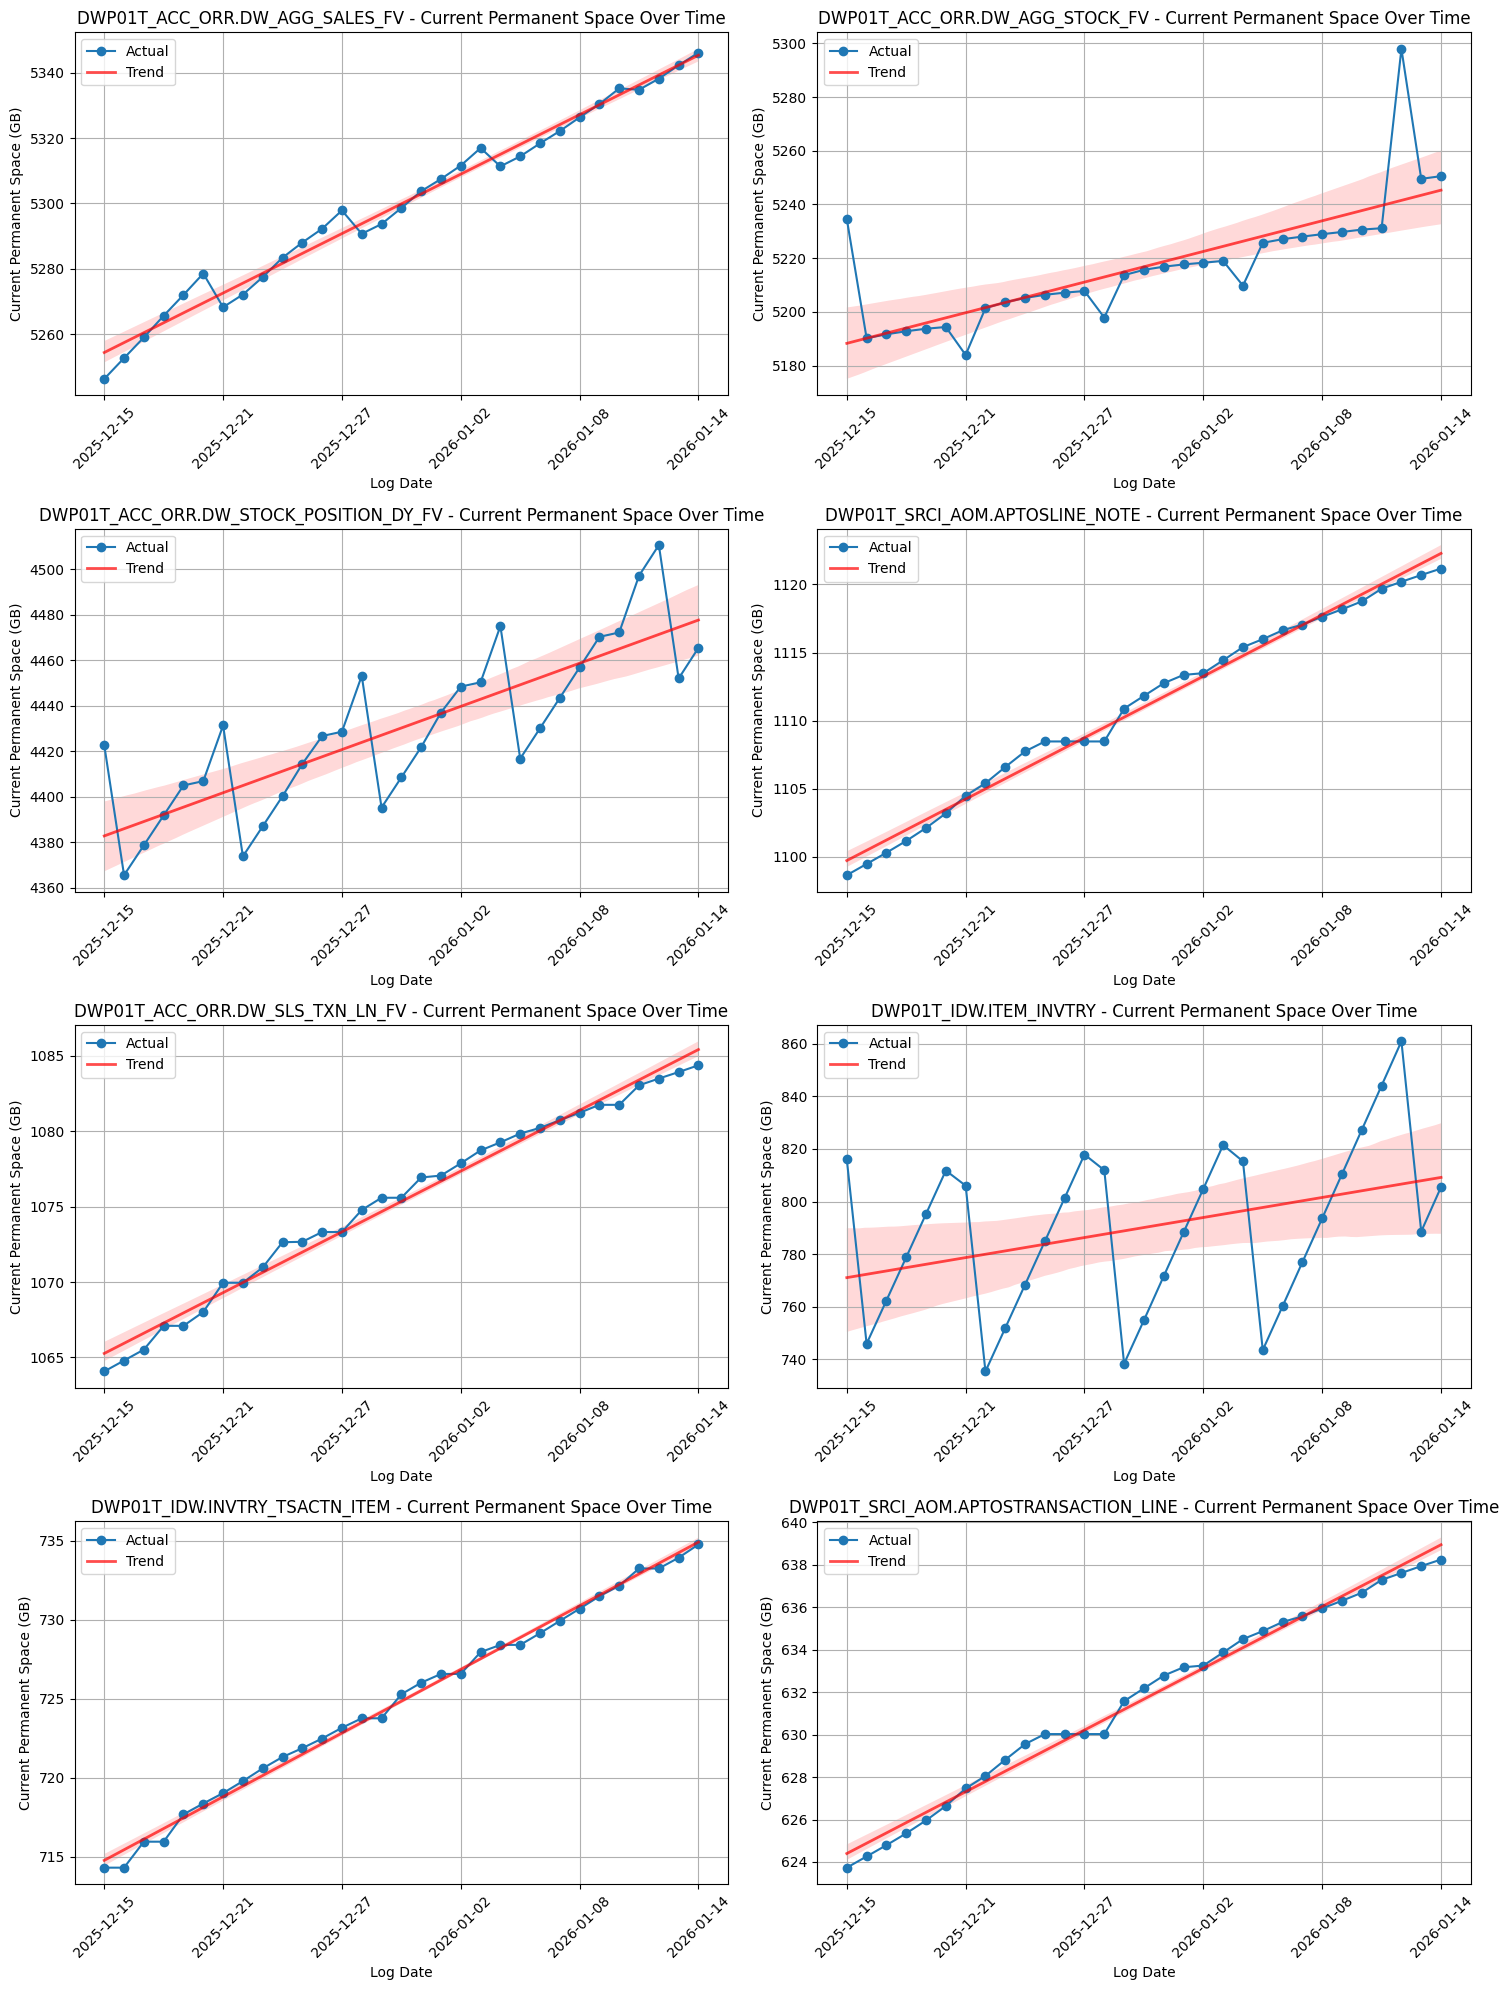

In [27]:
# plot the space usage of the top 8 tables over time in seperate sub plots for each plot
import matplotlib.pyplot as plt
top_tables = df_latest.nlargest(8, 'CURRENTPERM')[['DatabaseName', 'Tablename']]
top_tables_list = top_tables.apply(lambda row: (row['DatabaseName'], row['Tablename']), axis=1).tolist()
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, (db_name, table_name) in enumerate(top_tables_list):
    ax = axes[i // 2, i % 2]

    df_table = df[(df['DatabaseName'] == db_name) & (df['Tablename'] == table_name)].sort_values('LogDate').reset_index(drop=True)
    
    # Plot the data
    ax.plot(df_table.index, df_table['CURRENTPERM'] / 1024**3, marker='o', label='Actual')
        
    # add a regression line to the plot
    if len(df_table) > 1:
        sns.regplot(
            x=df_table.index,
            y=df_table['CURRENTPERM'] / 1024**3,
            scatter=False,
            ax=ax,
            line_kws={"color": "red", "alpha": 0.7, "lw": 2},
            label='Trend'
        )
    
    # Set x-axis labels to show dates
    ax.set_xticks(df_table.index[::max(1, len(df_table)//5)])
    ax.set_xticklabels([str(d) for d in df_table.loc[df_table.index[::max(1, len(df_table)//5)], 'LogDate']], rotation=45)
    
    ax.set_title(f'{db_name}.{table_name} - Current Permanent Space Over Time')
    ax.set_xlabel('Log Date')
    ax.set_ylabel('Current Permanent Space (GB)')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

## 12. Export Results to CSV (Optional)

Save the results to CSV files for further analysis or reporting.

In [ ]:
if df is not None and not df.empty:
    # Create output directory if it doesn't exist
    output_dir = Path('output')
    output_dir.mkdir(exist_ok=True)
    
    # Generate filename with date range
    filename = f"tablespace_dwp01_{start_date}_{end_date}.csv"
    output_path = output_dir / filename
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"✓ Data exported to: {output_path}")
    print(f"  Rows: {len(df):,}")
    print(f"  File size: {output_path.stat().st_size / 1024**2:.2f} MB")
else:
    print("No data to export.")

✓ Data exported to: output\tablespace_dwp01_2025-12-15_2026-01-14.csv
  Rows: 182,268
  File size: 15.66 MB


## 13. Close Connections

Properly clean up database connections when done.

In [ ]:
try:
    if 'report' in locals():
        report.close()
        print("✓ All database connections closed successfully")
    else:
        print("No report instance to close")
except Exception as e:
    print(f"✗ Error closing connections: {e}")

2026-01-15 07:52:07,394 - src.connection - INFO - Closed connection to 'test'


✓ All database connections closed successfully
